In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot , plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fourth-sem/sem-LONG-project/portfolio_data.csv")

In [ ]:
df.head(5)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
amazon = df.reset_index()['AMZN']

In [ ]:
amazon = np.array(amazon)

In [ ]:
amazon = amazon.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
preprocessed_amazon = sc.fit_transform(amazon)
def form_dataset(dataset , time_step = 1):
  X , y = [] , []
  for i in range(len(dataset) - time_step):
    a = dataset[i:(i+time_step) , 0]
    X.append(a)
    y.append(dataset[i+time_step , 0])
  return np.array(X) , np.array(y)

In [ ]:
train_size_a = int(0.7*len(preprocessed_amazon))
train_data_a = preprocessed_amazon[:train_size_a]


In [ ]:
time_step = 100
X_amazon_train , y_amazon_train = form_dataset(train_data_a , time_step)

In [ ]:
X_amazon_train = X_amazon_train.reshape(X_amazon_train.shape[0] , X_amazon_train.shape[1] , 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM , Dense

In [ ]:
seq = Sequential()
seq.add(LSTM(75 , return_sequences = True , input_shape=(100,1)))
seq.add(LSTM(75 , return_sequences = True))
seq.add(LSTM(75))
seq.add(Dense(1))
seq.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [1]:
seq.fit(X_amazon_train , y_amazon_train , epochs = 100 , verbose = 1 , batch_size = 64)

NameError: name 'seq' is not defined

In [ ]:
test_amazon = preprocessed_amazon[train_size_a:]

In [ ]:
X_test_amazon , y_test_amazon = form_dataset(test_amazon , time_step)

In [ ]:
X_test_amazon = X_test_amazon.reshape(X_test_amazon.shape[0] , X_test_amazon.shape[1] , 1)
np.random.seed(42)
preds_amazon = seq.predict(X_test_amazon)
preds_amazon_train = seq.predict(X_amazon_train)

31/31 [==============================] - 2s 74ms/step


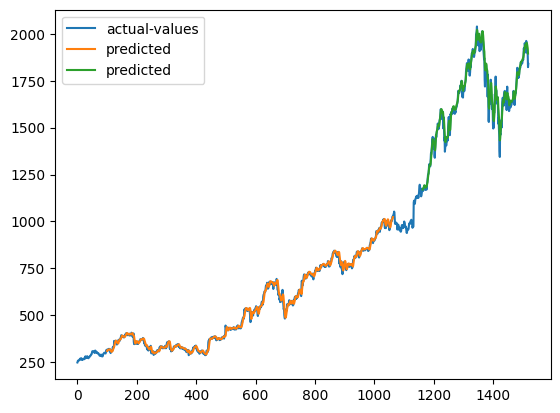

In [ ]:
preds_1 = sc.inverse_transform(preds_amazon_train)
preds_2 = sc.inverse_transform(preds_amazon)
past_days = 100
plot_train = np.empty_like(amazon)
plot_train[:,:] = np.nan
plot_train[past_days:len(preds_amazon_train)+past_days , :] = preds_1

plot_test = np.empty_like(amazon)
plot_test[:,:] = np.nan
plot_test[len(preds_amazon_train) + (past_days*2) - 1:len(amazon) - 1 , :] = preds_2

plt.plot(df['AMZN'] , label = 'actual-values')
plt.plot(plot_train   ,label = 'predicted')
plt.plot(plot_test  ,  label = 'predicted')
plt.legend()
plt.show()